In [256]:
# Script to convert all MIDIs to .wav files. 
# Uncomment if you only have the MIDI files

# import os
# from midi2audio import FluidSynth

# for file in os.listdir("midis"):
#     fs = FluidSynth()
#     fs.midi_to_audio("./midis/"+file, "./wavs/"+file+".wav")

In [41]:
%matplotlib inline
import itertools
import matplotlib.pyplot as plt
import config1

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

import librosa
import numpy
import scipy
import pandas as pd
import os
import sklearn
import config1
import joblib

In [ ]:
# ---------------DO NOT execute this block if you alreadt downloaded data_set.csv----------------

def main():
    samp_rate = config1.CreateDataset.SAMPLING_RATE
    frame_size = config1.CreateDataset.FRAME_SIZE
    hop_size = config1.CreateDataset.HOP_SIZE
    dataset_dir = config1.CreateDataset.DATASET_DIRECTORY

    is_created = False

    print("Extracting features from audios...")
            
    sample_arrays, composer_labels, era_labels = get_sample_arrays(dataset_dir, samp_rate)
    for sample_array in sample_arrays:

        row = extract_features(sample_array, samp_rate, frame_size, hop_size)
        if not is_created:
            dataset_numpy = numpy.array(row)
            is_created = True
        elif is_created:
            dataset_numpy = numpy.vstack((dataset_numpy, row))
            
    print("Normalizing the data...")
    scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
    scaler.fit(dataset_numpy)
    
    joblib_file = "joblib_scaler.pkl"  
    joblib.dump(scaler, joblib_file)

    dataset_numpy = scaler.transform(dataset_numpy)

    Feature_Names = ['meanZCR', 'stdZCR', 'meanSpecCentroid', 'stdSpecCentroid', 'meanSpecContrast', 'stdSpecContrast',
                     'meanSpecBandwidth', 'stdSpecBandwidth', 'meanSpecRollof', 'stdSpecRollof',
                     'meanMFCC_1', 'stdMFCC_1', 'meanMFCC_2', 'stdMFCC_2', 'meanMFCC_3', 'stdMFCC_3',
                     'meanMFCC_4', 'stdMFCC_4', 'meanMFCC_5', 'stdMFCC_5', 'meanMFCC_6', 'stdMFCC_6',
                     'meanMFCC_7', 'stdMFCC_7', 'meanMFCC_8', 'stdMFCC_8', 'meanMFCC_9', 'stdMFCC_9',
                     'meanMFCC_10', 'stdMFCC_10', 'meanMFCC_11', 'stdMFCC_11', 'meanMFCC_12', 'stdMFCC_12',
                     'meanMFCC_13', 'stdMFCC_13'
                     ]
    dataset_pandas = pandas.DataFrame(dataset_numpy, columns=Feature_Names)

    dataset_pandas["genre"] = era_labels
    dataset_pandas["composer"] = composer_labels
    dataset_pandas.to_csv("data_set.csv", index=False)

    print("Data set has been created and sent to the project folder!")

def get_sample_arrays(dataset_dir, samp_rate):
    path_of_audios = librosa.util.find_files(dataset_dir)
    
    audios = []
    eras = []
    composers = []
    
    ds = pd.read_csv("ds_labeled_with_midi.csv")
    
    for audio in path_of_audios:
        x, sr = librosa.load(audio, sr=samp_rate, duration=60.0)
        audios.append(x)
        audio_name = audio.split("\\")[5][:-8]
        
        video_id = audio_name.split(", ")[-1]
        composer = ds.loc[ds['youtube_id'] == video_id]['fullname'].values[0]
        era = ds.loc[ds['youtube_id'] == video_id]['era'].values[0]

        composers.append(composer)
        eras.append(era)
        
    audios_numpy = numpy.array(audios)
    return audios_numpy, composers, eras


def extract_features(signal, sample_rate, frame_size, hop_size):
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y=signal, frame_length=frame_size, hop_length=hop_size)
    spectral_centroid = librosa.feature.spectral_centroid(y=signal, sr=sample_rate, n_fft=frame_size,
                                                          hop_length=hop_size)
    spectral_contrast = librosa.feature.spectral_contrast(y=signal, sr=sample_rate, n_fft=frame_size,
                                                          hop_length=hop_size)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=signal, sr=sample_rate, n_fft=frame_size,
                                                            hop_length=hop_size)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=signal, sr=sample_rate, n_fft=frame_size, hop_length=hop_size)
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_fft=frame_size, hop_length=hop_size)

    return [

        numpy.mean(zero_crossing_rate),
        numpy.std(zero_crossing_rate),
        numpy.mean(spectral_centroid),
        numpy.std(spectral_centroid),
        numpy.mean(spectral_contrast),
        numpy.std(spectral_contrast),
        numpy.mean(spectral_bandwidth),
        numpy.std(spectral_bandwidth),
        numpy.mean(spectral_rolloff),
        numpy.std(spectral_rolloff),

        numpy.mean(mfccs[1, :]),
        numpy.std(mfccs[1, :]),
        numpy.mean(mfccs[2, :]),
        numpy.std(mfccs[2, :]),
        numpy.mean(mfccs[3, :]),
        numpy.std(mfccs[3, :]),
        numpy.mean(mfccs[4, :]),
        numpy.std(mfccs[4, :]),
        numpy.mean(mfccs[5, :]),
        numpy.std(mfccs[5, :]),
        numpy.mean(mfccs[6, :]),
        numpy.std(mfccs[6, :]),
        numpy.mean(mfccs[7, :]),
        numpy.std(mfccs[7, :]),
        numpy.mean(mfccs[8, :]),
        numpy.std(mfccs[8, :]),
        numpy.mean(mfccs[9, :]),
        numpy.std(mfccs[9, :]),
        numpy.mean(mfccs[10, :]),
        numpy.std(mfccs[10, :]),
        numpy.mean(mfccs[11, :]),
        numpy.std(mfccs[11, :]),
        numpy.mean(mfccs[12, :]),
        numpy.std(mfccs[12, :]),
        numpy.mean(mfccs[13, :]),
        numpy.std(mfccs[13, :]),
    ]


if __name__ == '__main__':
    main()


## helper functions

In [57]:
def confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    #classes_tick = [c[:3] for c in classes]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = numpy.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def plot_cnf(model,dataset_x,dataset_y,labels):
    true_y=dataset_y
    true_x=dataset_x
    pred=model.predict(true_x)

    #print("---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------\n")

    #print("Real Test dataset labels: \n{}\n".format(true_y))
    #print("Predicted Test dataset labels: \n{}".format(pred))

    cnf_matrix=sklearn.metrics.confusion_matrix(true_y,pred, labels=labels)
    #print(cnf_matrix)
    if len(labels) <= 3:
        plt.figure()
    else:  
        plt.figure(figsize=(12, 12))
        
    a=confusion_matrix(cnf_matrix,classes=labels,title='Confusion matrix')

# Era Classification

In [259]:
data_set=pd.read_csv('data_set.csv',index_col=False)
GENRES=['Baroque', 'Classical', 'Romantic']

number_of_rows,number_of_cols = data_set.shape
data_set[:5].style

In [260]:
data_set['genre'].value_counts()

Romantic     541
Baroque      245
Classical    178
Name: genre, dtype: int64

<Axes: >

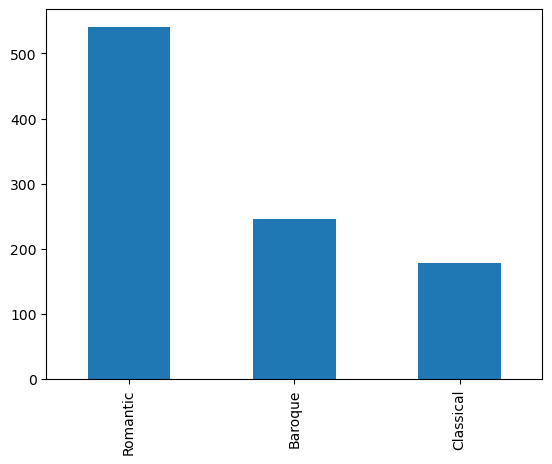

In [261]:
data_set['genre'].value_counts().plot(kind='bar')

In [262]:
data_set_values=numpy.array(data_set)

train, test = train_test_split(data_set_values, test_size = 0.2,random_state=2,
                              stratify=data_set_values[:,number_of_cols-2])

train_x=train[:,:number_of_cols-2]
train_y=train[:,number_of_cols-2]

test_x=test[:,:number_of_cols-2]
test_y=test[:,number_of_cols-2]

print("Training data size: {}".format(train.shape))
print("Test data size: {}".format(test.shape))

Training data size: (771, 38)
Test data size: (193, 38)


Max Accuracy is 0.756 on test dataset with 16 neighbors.

Training Score: 0.756
Test score: 0.756


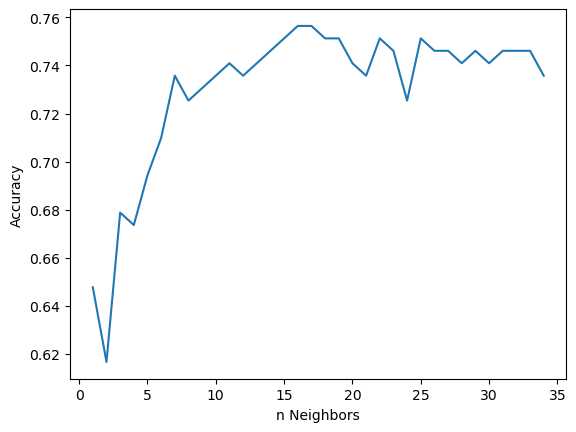

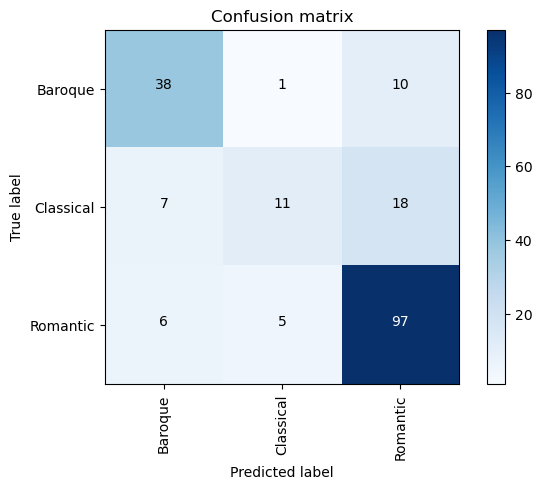

In [263]:
results_knn=[]
low = 1
high = 35
for i in range(low, high):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x,train_y)
    results_knn.append(knn.score(test_x,test_y))
    
max_accuracy_knn=max(results_knn)
best_k=results_knn.index(max(results_knn))+low
print("Max Accuracy is {:.3f} on test dataset with {} neighbors.\n".format(max_accuracy_knn,best_k))

plt.plot(numpy.arange(low,high),results_knn)
plt.xlabel("n Neighbors")
plt.ylabel("Accuracy")


knn=KNeighborsClassifier(n_neighbors=best_k)
knn.fit(train_x,train_y)
print("Training Score: {:.3f}".format(knn.score(train_x,train_y)))
print("Test score: {:.3f}".format(knn.score(test_x,test_y)))  

plot_cnf(knn,test_x,test_y,GENRES)

Max Accuracy is 0.767 on test dataset with 28 estimators.

Training Score: 1.000
Test score: 0.741


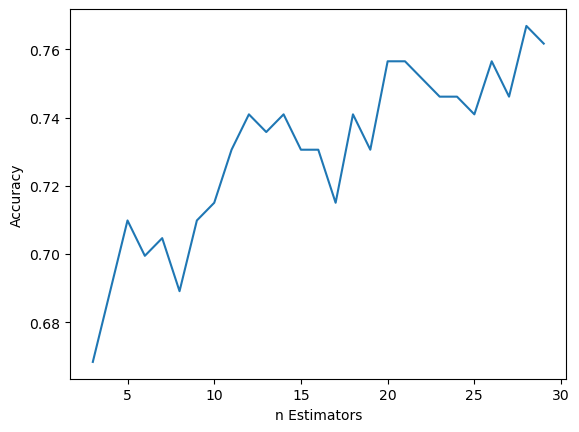

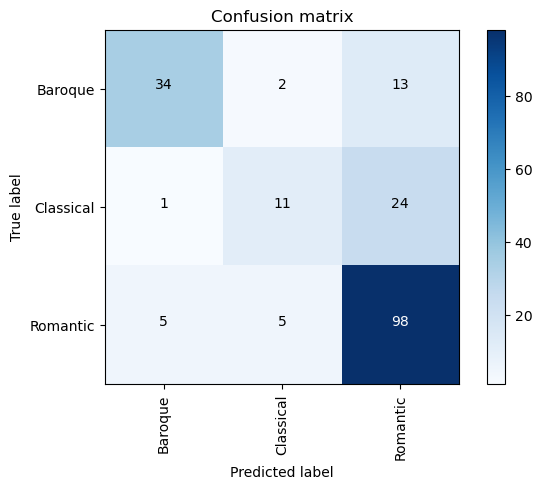

In [264]:
results_forest=[]
low = 3
high = 30
for i in range(low,high):
    forest=RandomForestClassifier(random_state=2,n_estimators=i)
    forest.fit(train_x,train_y)
    results_forest.append(forest.score(test_x,test_y))
    
max_accuracy_forest=max(results_forest)
best_n_est=results_forest.index(max(results_forest))+low
print("Max Accuracy is {:.3f} on test dataset with {} estimators.\n".format(max_accuracy_forest,best_n_est))

plt.plot(numpy.arange(low,high),results_forest)
plt.xlabel("n Estimators")
plt.ylabel("Accuracy")


forest=RandomForestClassifier(random_state=42,n_estimators=best_n_est)
forest.fit(train_x,train_y)
print("Training Score: {:.3f}".format(forest.score(train_x,train_y)))
print("Test score: {:.3f}".format(forest.score(test_x,test_y)))

plot_cnf(forest,test_x,test_y,GENRES)

Max Accuracy is 0.803 on test dataset with 13 as C.

Training Score: 0.842
Test score: 0.803


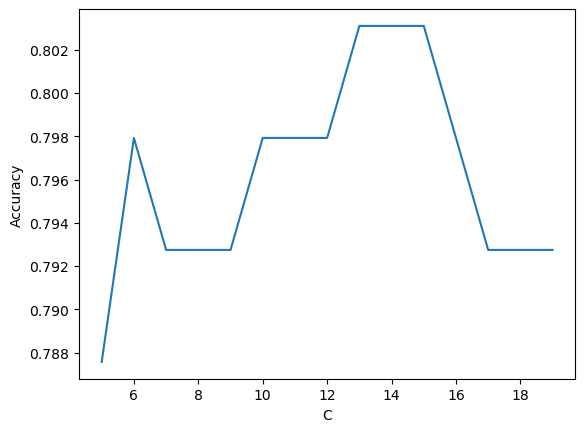

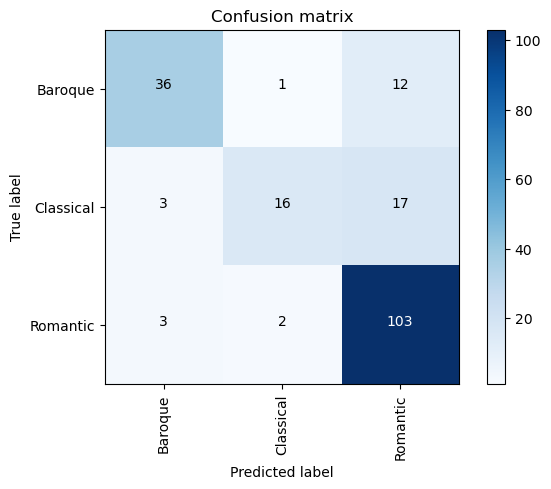

In [266]:
results_svm=[]
low = 5
high = 20
for i in range(low,high):
    svm=SVC(C=i,gamma=0.08, random_state=2)
    svm.fit(train_x,train_y)
    results_svm.append(svm.score(test_x,test_y))
    
max_accuracy_svm=max(results_svm)
best_c=results_svm.index(max(results_svm))+low
print("Max Accuracy is {:.3f} on test dataset with {} as C.\n".format(max_accuracy_svm,best_c))

plt.plot(numpy.arange(low,high),results_svm)
plt.xlabel("C")
plt.ylabel("Accuracy")

svm=SVC(random_state=42, C=best_c,gamma=0.08, probability=True)
svm.fit(train_x,train_y)
print("Training Score: {:.3f}".format(svm.score(train_x,train_y)))
print("Test score: {:.3f}".format(svm.score(test_x,test_y)))

plot_cnf(svm,test_x,test_y,GENRES)

In [140]:
import joblib

joblib_file = "joblib_model.pkl"  
joblib.dump(svm, joblib_file)

['joblib_model.pkl']

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Training Score: 0.952
Test score: 0.767


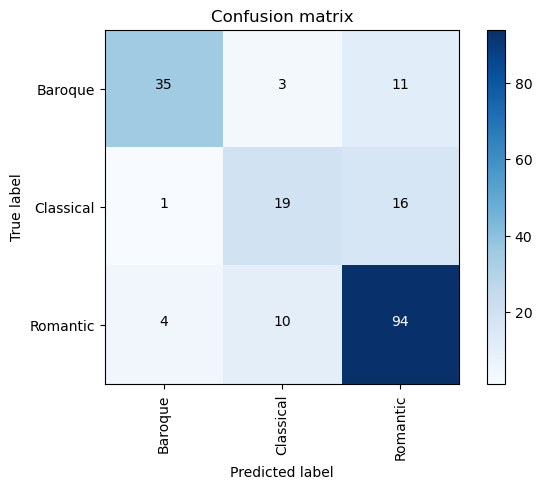

In [267]:
neural=MLPClassifier(max_iter=400,random_state=2,hidden_layer_sizes=[40,40])
neural.fit(train_x,train_y)
print("Training Score: {:.3f}".format(neural.score(train_x,train_y)))
print("Test score: {:.3f}".format(neural.score(test_x,test_y)))

plot_cnf(neural,test_x,test_y,GENRES)

# Composer Classification

In [268]:
ds = pd.read_csv("ds_labeled_with_midi.csv")
ds['fullname'].value_counts()

Franz Liszt               197
Johann Sebastian Bach     147
Franz Schubert            127
Ludwig van Beethoven       82
George Frideric Handel     78
Joseph Haydn               64
Robert Schumann            39
Camille Saint-Saëns        36
Edvard Grieg               35
Felix Mendelssohn          35
Johannes Brahms            25
Muzio Clementi             22
Clara Schumann             15
Richard Wagner             12
Henry Purcell              10
Alessandro Scarlatti        5
Max Bruch                   5
Luigi Boccherini            5
Jean Sibelius               5
Richard Strauss             5
Georg Philipp Telemann      5
Giuseppe Verdi              5
Leopold Mozart              5
Name: fullname, dtype: int64

In [269]:
COMPOSERS = data_set['composer'].unique()

In [270]:
from sklearn.model_selection import train_test_split

data_set_values=numpy.array(data_set)

train, test = train_test_split(data_set_values, test_size = 0.2,random_state=2, stratify=data_set_values[:,number_of_cols-1])

train_x=train[:,:number_of_cols-2]
train_y=train[:,number_of_cols-1]

test_x=test[:,:number_of_cols-2]
test_y=test[:,number_of_cols-1]

print("Training data size: {}".format(train.shape))
print("Test data size: {}".format(test.shape))

Training data size: (771, 38)
Test data size: (193, 38)


Max Accuracy is 0.399 on test dataset with 16 neighbors.

Training Score: 0.473
Test score: 0.399


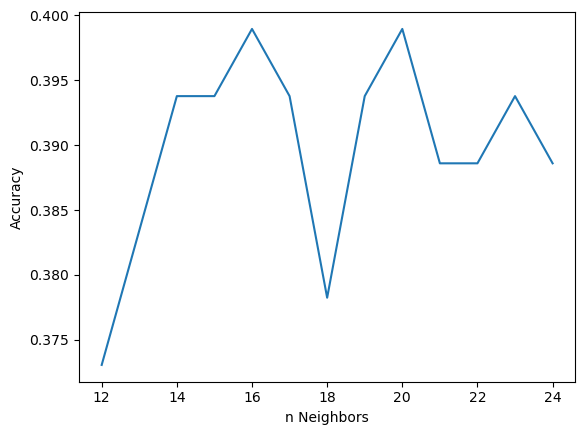

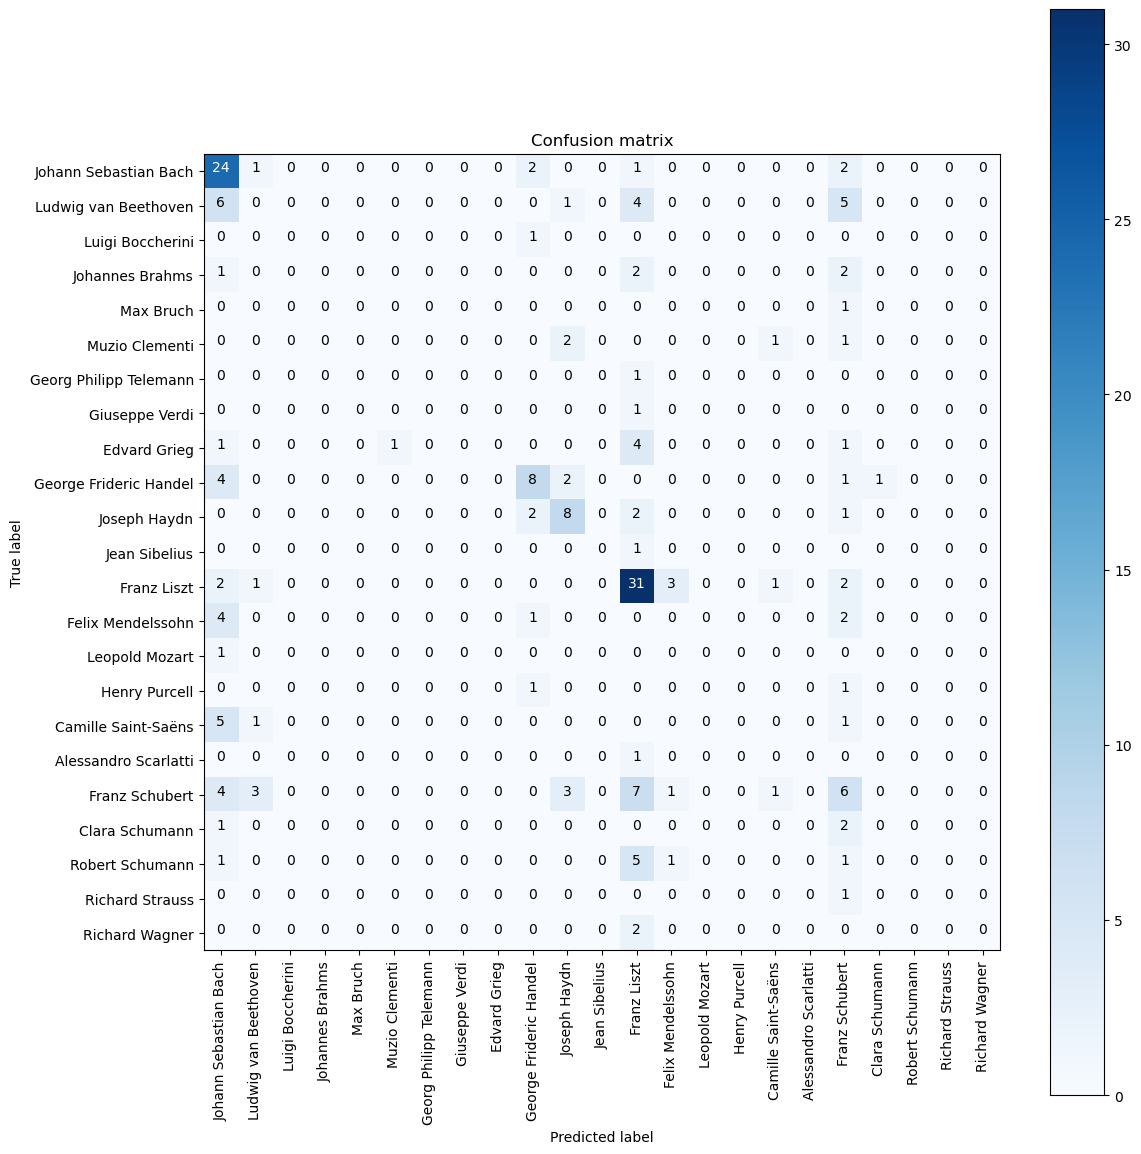

In [274]:
results_knn=[]
low = 12
high = 25
for i in range(low,high):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x,train_y)
    results_knn.append(knn.score(test_x,test_y))
    
max_accuracy_knn=max(results_knn)
best_k=results_knn.index(max(results_knn))+low
print("Max Accuracy is {:.3f} on test dataset with {} neighbors.\n".format(max_accuracy_knn,best_k))

plt.plot(numpy.arange(low,high),results_knn)
plt.xlabel("n Neighbors")
plt.ylabel("Accuracy")


knn=KNeighborsClassifier(n_neighbors=best_k)
knn.fit(train_x,train_y)
print("Training Score: {:.3f}".format(knn.score(train_x,train_y)))
print("Test score: {:.3f}".format(knn.score(test_x,test_y)))  

plot_cnf(knn,test_x,test_y,COMPOSERS)

Max Accuracy is 0.430 on test dataset with 71 estimators.

Training Score: 1.000
Test score: 0.430


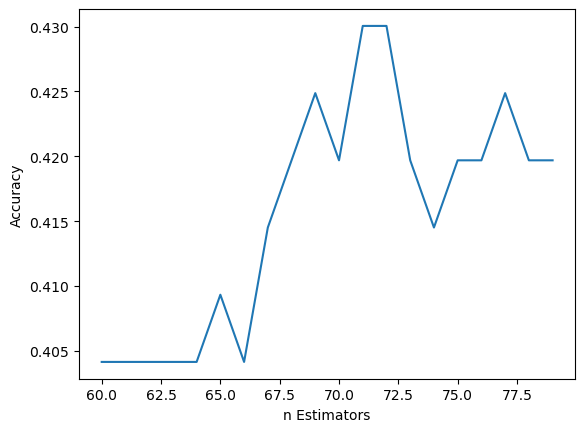

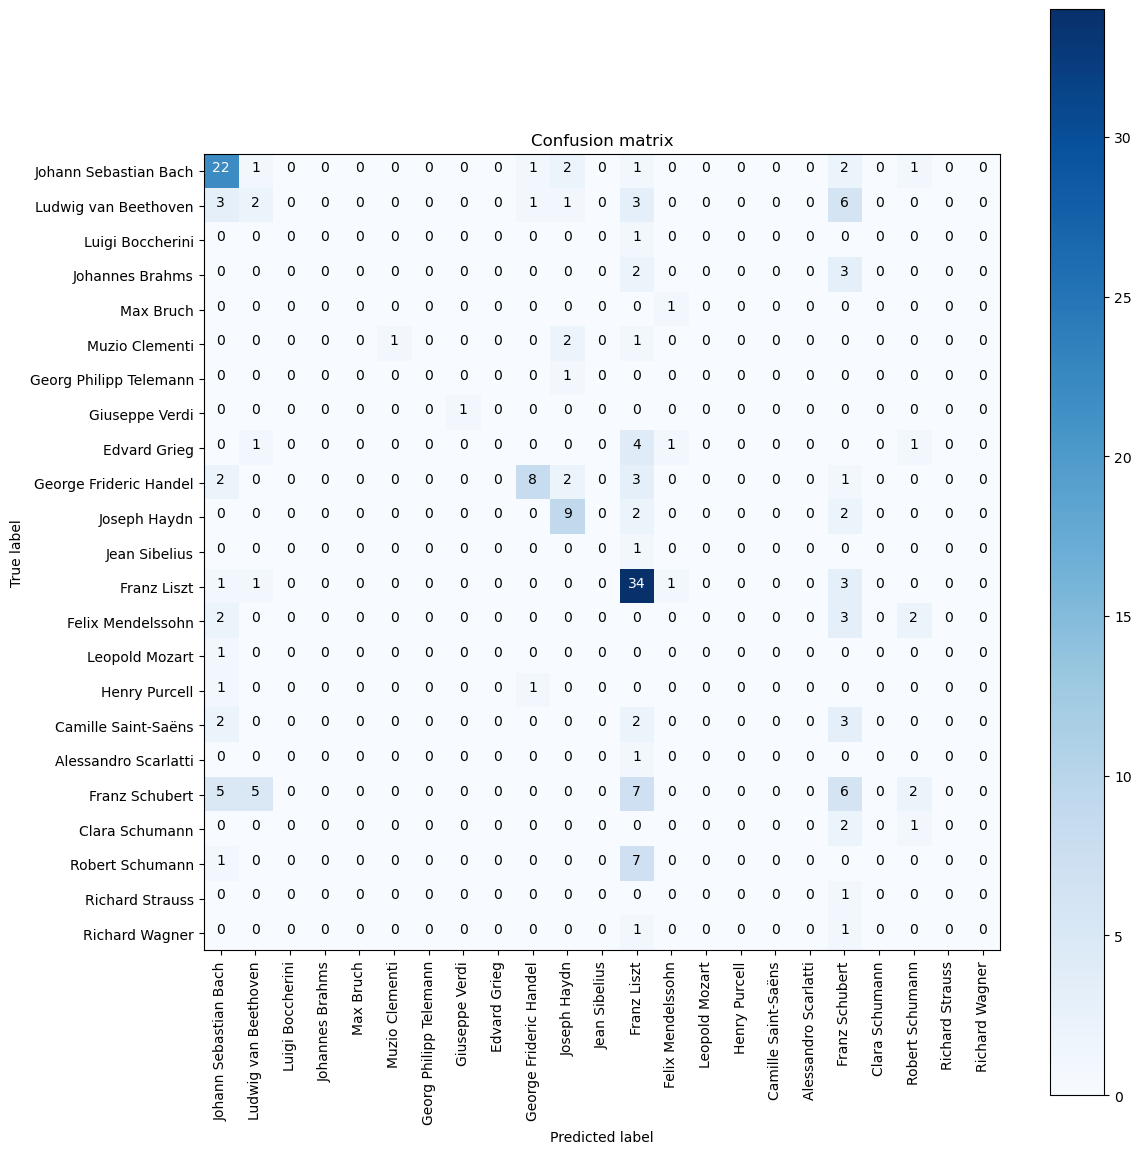

In [281]:
results_forest=[]
low = 60
high = 80
for i in range(low,high):
    forest=RandomForestClassifier(random_state=42,n_estimators=i)
    forest.fit(train_x,train_y)
    results_forest.append(forest.score(test_x,test_y))
    
max_accuracy_forest=max(results_forest)
best_n_est=results_forest.index(max(results_forest))+ low
print("Max Accuracy is {:.3f} on test dataset with {} estimators.\n".format(max_accuracy_forest,best_n_est))

plt.plot(numpy.arange(low,high),results_forest)
plt.xlabel("n Estimators")
plt.ylabel("Accuracy")


forest=RandomForestClassifier(random_state=42,n_estimators=best_n_est)
forest.fit(train_x,train_y)
print("Training Score: {:.3f}".format(forest.score(train_x,train_y)))
print("Test score: {:.3f}".format(forest.score(test_x,test_y)))

plot_cnf(forest,test_x,test_y,COMPOSERS)

Max Accuracy is 0.451 on test dataset with C value 16 .

Training Score: 0.855
Test score: 0.451


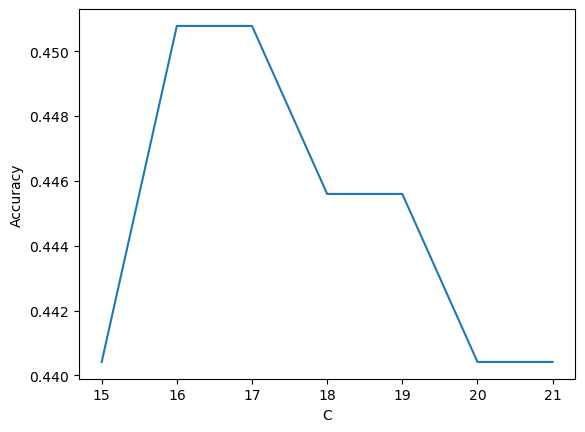

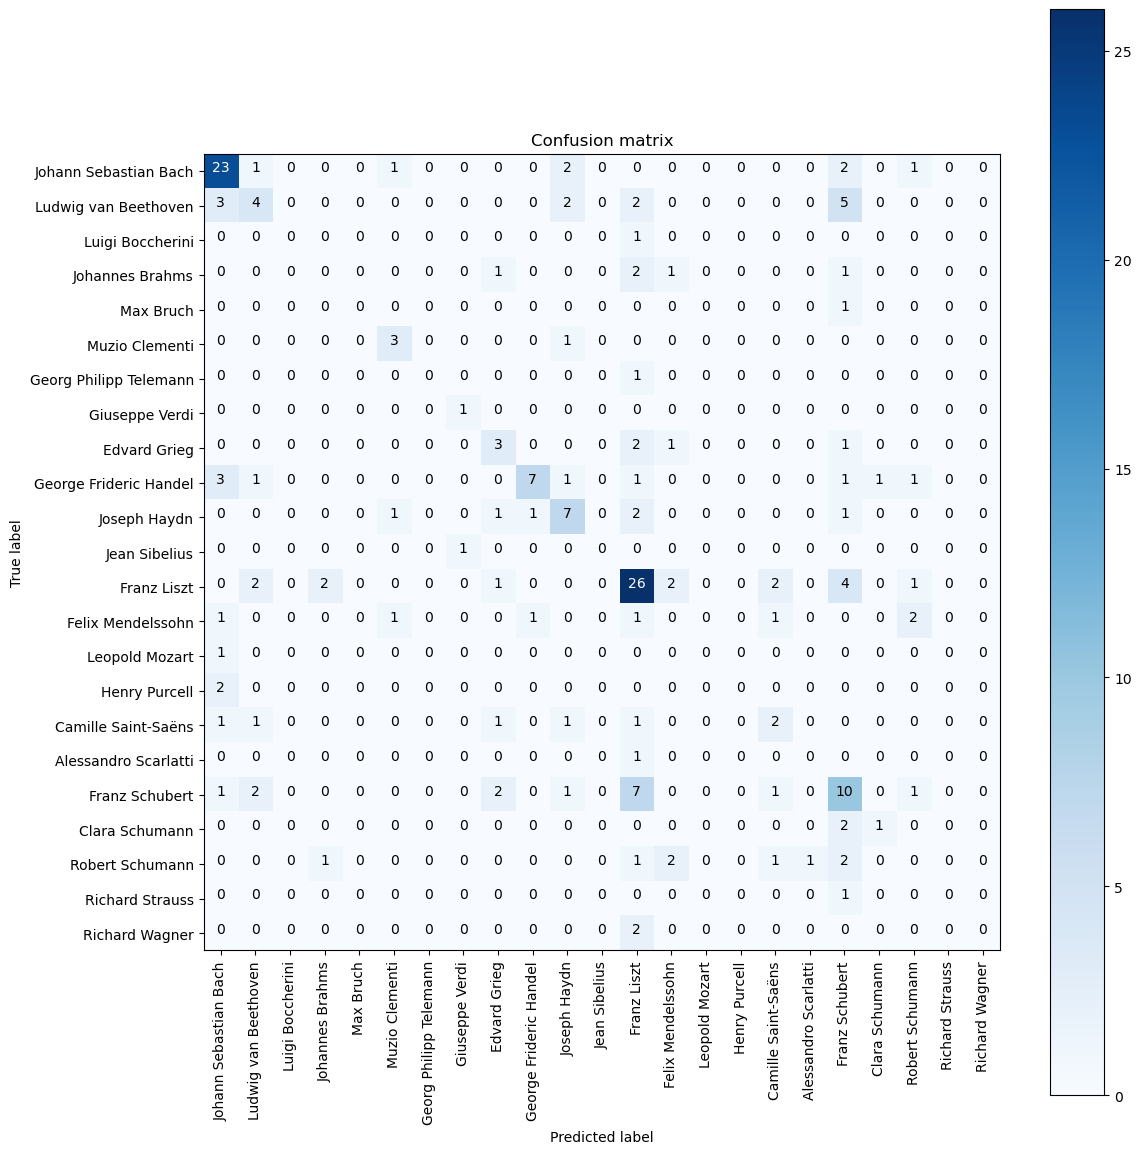

In [283]:
results_SVC=[]
low = 15
high = 22
for i in range(low,high):
    svm=SVC(C=i, random_state=42)
    svm.fit(train_x,train_y)
    results_SVC.append(svm.score(test_x,test_y))
    
max_accuracy_svm=max(results_SVC)
best_c=results_SVC.index(max(results_SVC))+low
print("Max Accuracy is {:.3f} on test dataset with C value {} .\n".format(max_accuracy_svm,best_c))

plt.plot(numpy.arange(low,high),results_SVC)
plt.xlabel("C")
plt.ylabel("Accuracy")


svm=SVC(C=best_c, random_state=42)
svm.fit(train_x,train_y)
print("Training Score: {:.3f}".format(svm.score(train_x,train_y)))
print("Test score: {:.3f}".format(svm.score(test_x,test_y)))

plot_cnf(svm,test_x,test_y,COMPOSERS)

In [300]:
parameters = {
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
              'degree': [1, 2, 3, 4, 5], 
              'C': [10, 11, 12, 13, 14], 
              'gamma': ['scale', 'auto'], 
              'shrinking': [True, False], 
              'class_weight': ['balanced', None], 
              'decision_function_shape': ['ovo', 'ovr'], 
              'break_ties': [True, False],
              'random_state':[2]
             }

svm = SVC()
clf = GridSearchCV(svm, parameters, cv=4)

In [301]:
clf.fit(train_x, train_y)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "D:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_va

GridSearchCV(cv=4, estimator=SVC(),
             param_grid={'C': [10, 11, 12, 13, 14], 'break_ties': [True, False],
                         'class_weight': ['balanced', None],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'degree': [1, 2, 3, 4, 5], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'random_state': [2], 'shrinking': [True, False]})

In [302]:
clf.best_params_

{'C': 10,
 'break_ties': False,
 'class_weight': None,
 'decision_function_shape': 'ovo',
 'degree': 2,
 'gamma': 'scale',
 'kernel': 'poly',
 'random_state': 2,
 'shrinking': True}

Training Score: 0.737
Test score: 0.456


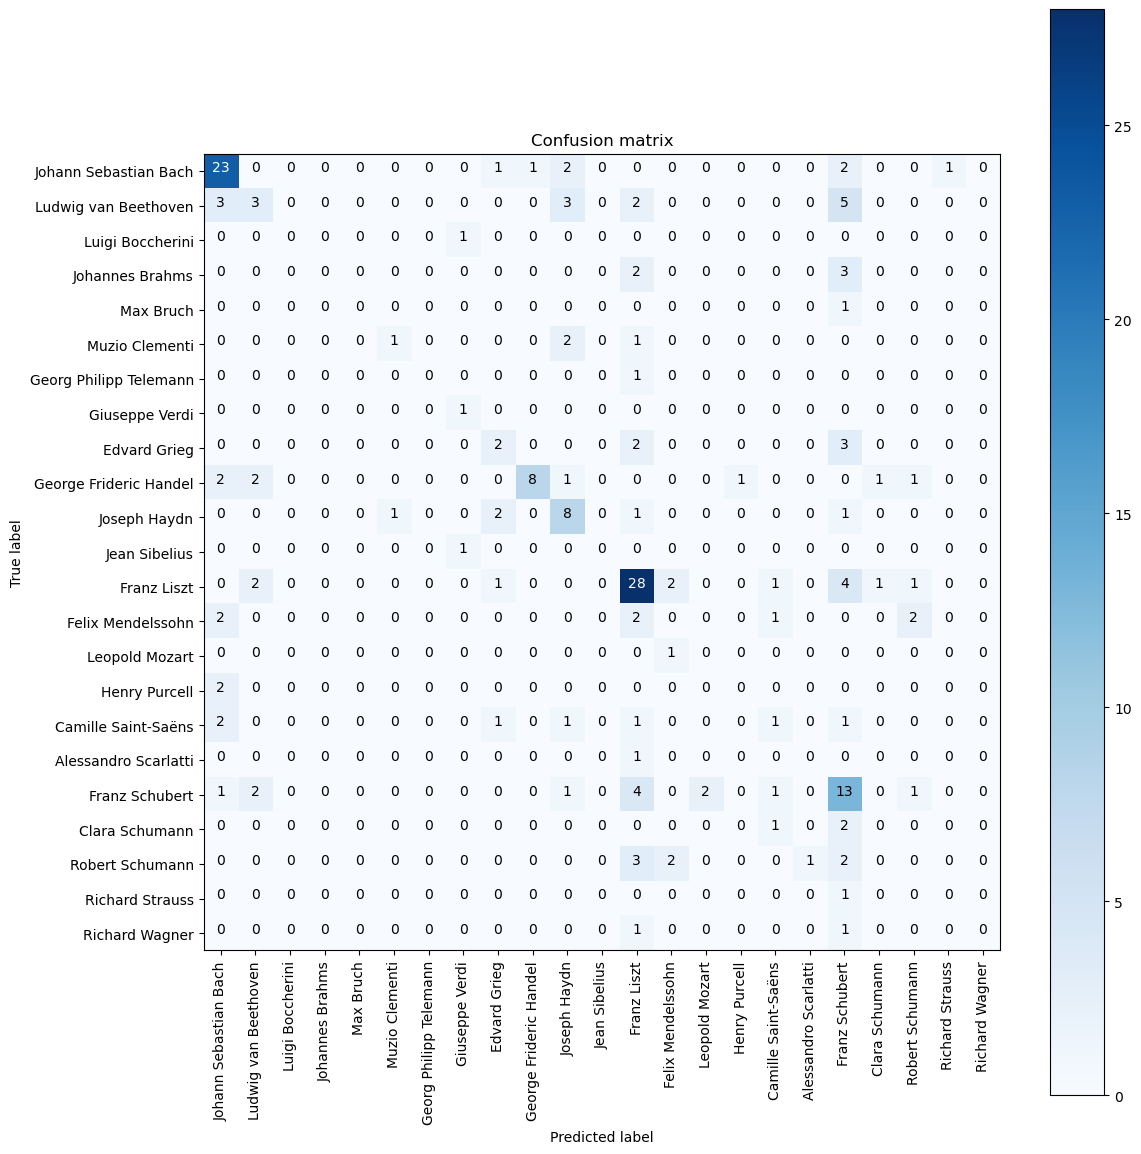

In [303]:
print("Training Score: {:.3f}".format(clf.score(train_x,train_y)))
print("Test score: {:.3f}".format(clf.score(test_x,test_y)))

plot_cnf(clf,test_x,test_y,COMPOSERS)

In [309]:
joblib_file = "joblib_model_composer.pkl"  
joblib.dump(clf_best, joblib_file)

['joblib_model_composer.pkl']

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Training Score: 0.669
Test score: 0.415


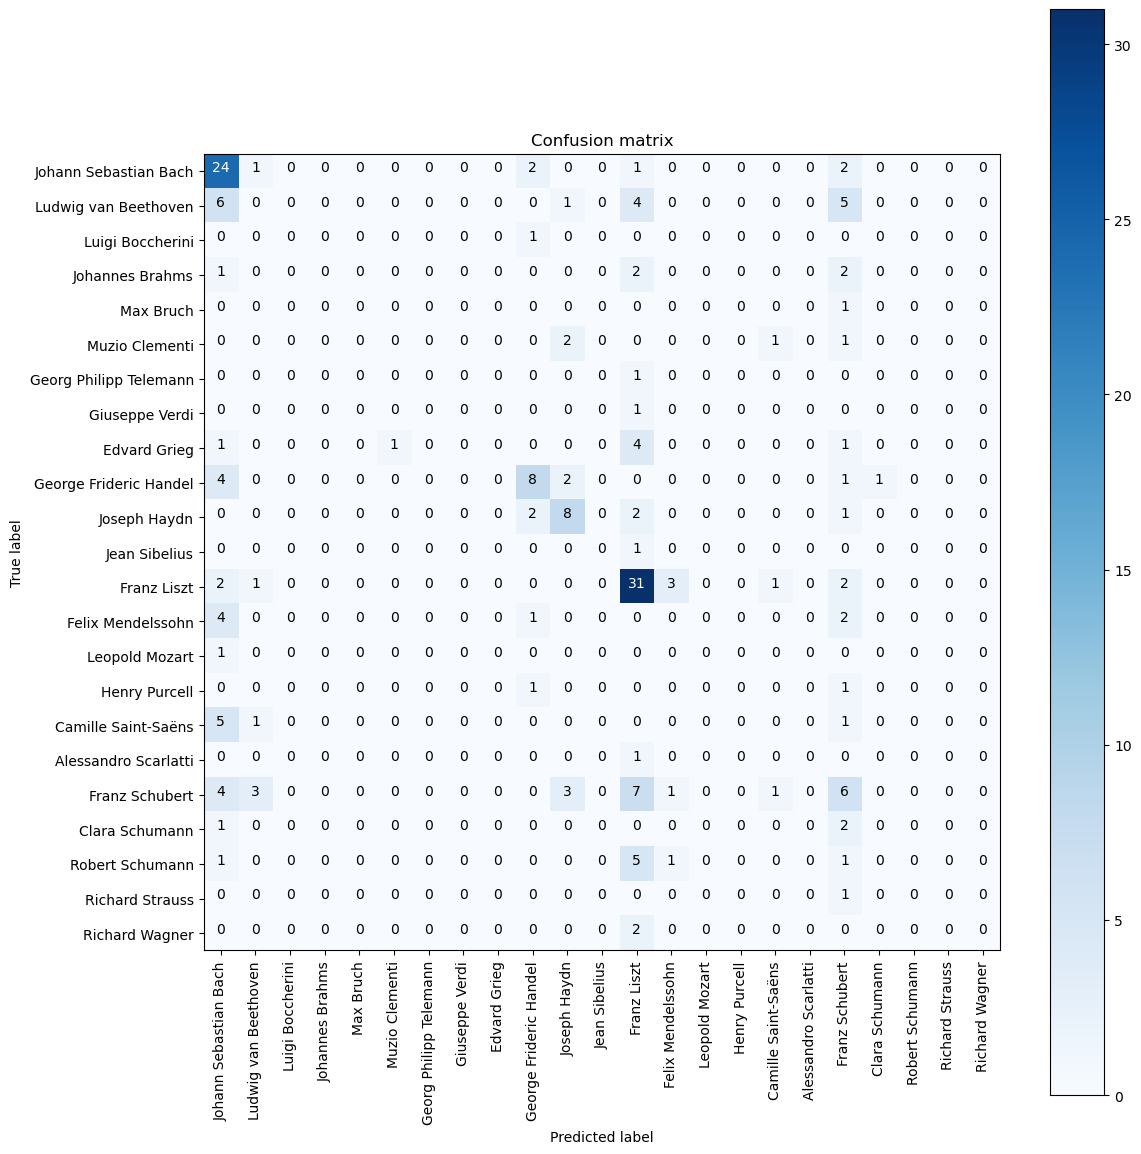

In [284]:
neural=MLPClassifier(max_iter=400,random_state=42,hidden_layer_sizes=[40,40])
neural.fit(train_x,train_y)
print("Training Score: {:.3f}".format(neural.score(train_x,train_y)))
print("Test score: {:.3f}".format(neural.score(test_x,test_y)))

plot_cnf(knn,test_x,test_y,COMPOSERS)

# Year

In [19]:
metadata = pd.read_csv("ds_labeled_with_midi.csv")
data_set=pd.read_csv('data_set.csv',index_col=False)

In [20]:
ds_merged = pd.concat([data_set, metadata], axis=1)

In [30]:
ds_merged['year'] = ds_merged.apply(lambda x: round(numpy.mean([x['birth'], x['death']])), axis=1)

In [121]:
ds_merged['year'].min()

1677

In [120]:
ds_merged['year'].max()

1911

In [32]:
ds_merged.head()

meanZCR    stdZCR  meanSpecCentroid  stdSpecCentroid  meanSpecContrast  \
0 -0.401560 -0.780002         -0.494189        -0.592350          0.035820   
1 -0.264197 -0.866206         -0.325573        -0.771330          0.452714   
2 -0.202483 -0.869528         -0.346790        -0.756393         -0.031703   
3 -0.108152 -0.894032         -0.280092        -0.795122          0.324857   
4 -0.356957 -0.849327         -0.339062        -0.244189          0.046942   

   stdSpecContrast  meanSpecBandwidth  stdSpecBandwidth  meanSpecRollof  \
0        -0.164001          -0.527096         -0.498907       -0.569219   
1        -0.643958          -0.234982         -0.651156       -0.450553   
2        -0.571600          -0.412250         -0.679135       -0.451790   
3        -0.594665          -0.340758         -0.705001       -0.417207   
4        -0.387906          -0.333758          0.122222       -0.372178   

   stdSpecRollof  ...  similarity  piano_solo_prob  \
0      -0.679286  ...    1.000000         0.892155   
1      -0.767674  ...    0.857143         0.790799   
2      -0.783425  ...    1.000000         0.952825   
3      -0.802286  ...    0.818182         0.675175   
4      -0.164419  ...    1.000000         0.846741   

                                          audio_name  audio_duration  \
0  Bach, Johann Sebastian, Air in F major, BWV An...       60.157469   
1  Bach, Johann Sebastian, Allemande in C minor, ...      285.985469   
2  Bach, Johann Sebastian, Allemande in G minor, ...      155.737469   
3  Bach, Johann Sebastian, Als der gütige Gott vo...       41.257469   
4  Bach, Johann Sebastian, Andante in G minor, BW...      111.025469   

   giant_midi_piano  split  surname_in_youtube_title               fullname  \
0               1.0  train                       1.0  Johann Sebastian Bach   
1               1.0  train                       0.0  Johann Sebastian Bach   
2               1.0  train                       1.0  Johann Sebastian Bach   
3               1.0  train                       1.0  Johann Sebastian Bach   
4               1.0  train                       1.0  Johann Sebastian Bach   

       era  year  
0  Baroque  1718  
1  Baroque  1718  
2  Baroque  1718  
3  Baroque  1718  
4  Baroque  1718  

[5 rows x 58 columns]

In [37]:
y = ds_merged['year']
X = ds_merged.iloc[:, :36]

ds = pd.concat([X, y], axis=1)

In [52]:
number_of_rows,number_of_cols = ds.shape

data_set_values=numpy.array(ds)

In [54]:
train, test = train_test_split(data_set_values, test_size = 0.2,random_state=2,
                              stratify=data_set_values[:,number_of_cols-1])

train_x=train[:,:number_of_cols-1]
train_y=train[:,number_of_cols-1]

test_x=test[:,:number_of_cols-1]
test_y=test[:,number_of_cols-1]

print("Training data size: {}".format(train.shape))
print("Test data size: {}".format(test.shape))

Training data size: (771, 37)
Test data size: (193, 37)


In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [106]:
regressor = LinearRegression()

regressor.fit(train_x,train_y)

LinearRegression()

In [107]:
train_y_pred = regressor.predict(train_x)
test_y_pred = regressor.predict(test_x)

In [108]:
print("Training RMSE {:.3f}".format(mean_squared_error(train_y,train_y_pred, squared=False)))
print("Testing RMSE {:.3f}".format(mean_squared_error(test_y,test_y_pred,squared=False)))

print("Training MAE {:.3f}".format(mean_absolute_error(train_y,train_y_pred)))
print("Testing MAE {:.3f}".format(mean_absolute_error(test_y,test_y_pred)))

print("Training R2 {:.3f}".format(r2_score(train_y,train_y_pred)))
print("Testing R2 {:.3f}".format(r2_score(test_y,test_y_pred)))

Training RMSE 44.467
Testing RMSE 48.132
Training MAE 34.656
Testing MAE 37.838
Training R2 0.377
Testing R2 0.278


Min RMSE is 48.315 on test dataset with 2.5 as alpha.

Training RMSE 44.467
Testing RMSE 48.315
Training MAE 34.656
Testing MAE 38.530
Training R2 0.377
Testing R2 0.273


Text(0, 0.5, 'RMSE')

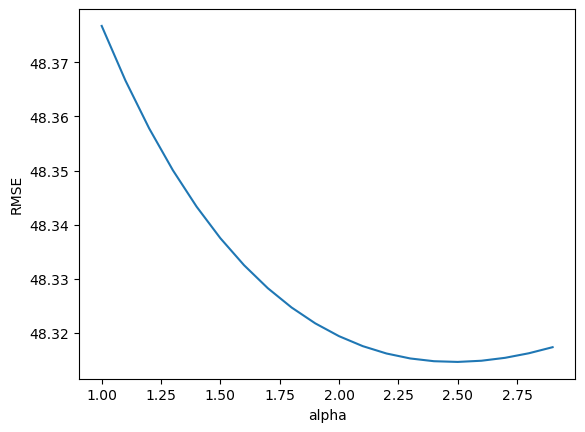

In [116]:
from sklearn.linear_model import Ridge
results_ridge=[]
low = 1
high = 3

for i in numpy.arange(low,high,0.1):
    ridge=Ridge(alpha=i)
    ridge.fit(train_x,train_y)
    test_y_pred = ridge.predict(test_x)
    results_ridge.append(mean_squared_error(test_y,test_y_pred,squared=False))
    
max_accuracy_ridge=min(results_ridge)
best_alpha=results_ridge.index(min(results_ridge))*0.1+low
print("Min RMSE is {:.3f} on test dataset with {} as alpha.\n".format(max_accuracy_ridge,best_alpha))

ridge=Ridge(alpha=best_alpha)
ridge.fit(train_x,train_y)
test_y_pred = ridge.predict(test_x)
print("Training RMSE {:.3f}".format(mean_squared_error(train_y,train_y_pred, squared=False)))
print("Testing RMSE {:.3f}".format(mean_squared_error(test_y,test_y_pred,squared=False)))

print("Training MAE {:.3f}".format(mean_absolute_error(train_y,train_y_pred)))
print("Testing MAE {:.3f}".format(mean_absolute_error(test_y,test_y_pred)))

print("Training R2 {:.3f}".format(r2_score(train_y,train_y_pred)))
print("Testing R2 {:.3f}".format(r2_score(test_y,test_y_pred)))

plt.plot(numpy.arange(low,high, 0.1),results_ridge)
plt.xlabel("alpha")
plt.ylabel("RMSE")

Min RMSE is 48.415 on test dataset with 0.1 as alpha.

Training RMSE 44.467
Testing RMSE 48.415
Training MAE 34.656
Testing MAE 38.658
Training R2 0.377
Testing R2 0.270


Text(0, 0.5, 'RMSE')

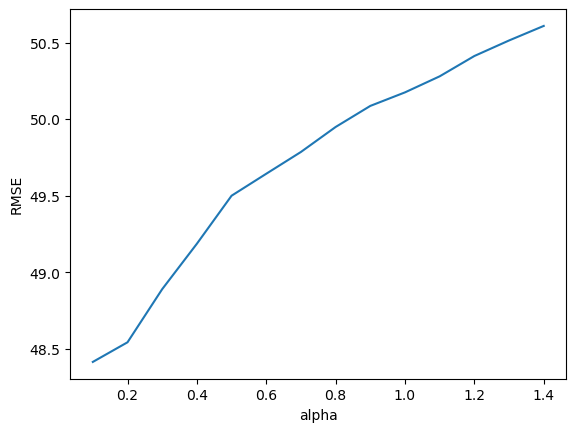

In [117]:
from sklearn.linear_model import Lasso
results_lasso=[]
low = 0.1
high = 1.5

for i in numpy.arange(low,high,0.1):
    lasso=Lasso(alpha=i)
    lasso.fit(train_x,train_y)
    test_y_pred = lasso.predict(test_x)
    results_lasso.append(mean_squared_error(test_y,test_y_pred,squared=False))
    
max_accuracy_lasso=min(results_lasso)
best_alpha=results_lasso.index(min(results_lasso))*0.1+low
print("Min RMSE is {:.3f} on test dataset with {} as alpha.\n".format(max_accuracy_lasso,best_alpha))

lasso=Lasso(alpha=best_alpha)
lasso.fit(train_x,train_y)
test_y_pred = lasso.predict(test_x)
print("Training RMSE {:.3f}".format(mean_squared_error(train_y,train_y_pred, squared=False)))
print("Testing RMSE {:.3f}".format(mean_squared_error(test_y,test_y_pred,squared=False)))

print("Training MAE {:.3f}".format(mean_absolute_error(train_y,train_y_pred)))
print("Testing MAE {:.3f}".format(mean_absolute_error(test_y,test_y_pred)))

print("Training R2 {:.3f}".format(r2_score(train_y,train_y_pred)))
print("Testing R2 {:.3f}".format(r2_score(test_y,test_y_pred)))

plt.plot(numpy.arange(low,high, 0.1),results_lasso)
plt.xlabel("alpha")
plt.ylabel("RMSE")